# Chapter 2: A real example. Importing data and setting series

## Data Management


In this example we will show how we can import data from a csv and generate a model with several depositional series.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

In this case instead loading a geo_data object directly, we will create one. The main atributes we need to pass are:
- Extent: X min, X max, Y min, Y max, Z min, Z max
- Resolution: X,Y,Z

Additionaly we can pass the address to csv files (GeoModeller3D format) with the data.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

In [3]:
gp.get_raw_data(geo_data, 'interfaces').head()

,X,Y,Z,formation,series,annotations
0,735484.817806,6.891936e+06,-1819.319309,SimpleMafic2,Default serie,"${\bf{x}}_{\alpha \,{\bf{1}},0}$"
1,719017.625000,6.892218e+06,508.179387,SimpleMafic2,Default serie,"${\bf{x}}_{\alpha \,{\bf{1}},1}$"
2,716849.500000,6.887358e+06,508.981894,SimpleMafic2,Default serie,"${\bf{x}}_{\alpha \,{\bf{1}},2}$"
3,732699.250000,6.885040e+06,494.526481,SimpleMafic2,Default serie,"${\bf{x}}_{\alpha \,{\bf{1}},3}$"
4,727316.313000,6.886460e+06,478.254423,SimpleMafic2,Default serie,"${\bf{x}}_{\alpha \,{\bf{1}},4}$"


You can visualize the points in 3D (work in progress)

In [4]:
gp.plot_data_3D(geo_data)

723415.321182 6891939.447817 -5298.1543090000005
723415.321182 6891939.447817 -5298.1543090000005
723415.321182 6891939.447817 -5298.1543090000005
723415.321182 6891939.447817 -5298.1543090000005
742907.686575 6891934.582632001 -2786.869309
742907.686575 6891934.582632001 -2786.869309
742907.686575 6891934.582632001 -2786.869309
742907.686575 6891934.582632001 -2786.869309
712584.536312 6891942.15112 -582.769334
712584.536312 6891942.15112 -582.769334
712584.536312 6891942.15112 -582.769334
712584.536312 6891942.15112 -582.769334
724309.279198 6905712.031145 -3763.8629950000004
724309.279198 6905712.031145 -3763.8629950000004
724309.279198 6905712.031145 -3763.8629950000004
724309.279198 6905712.031145 -3763.8629950000004
728653.9332569999 6905714.891064 -4196.807995
728653.9332569999 6905714.891064 -4196.807995
728653.9332569999 6905714.891064 -4196.807995
728653.9332569999 6905714.891064 -4196.807995
732788.182361 6905717.612482001 -1680.306995
732788.182361 6905717.612482001 -1680.3

Or a projection in 2D:

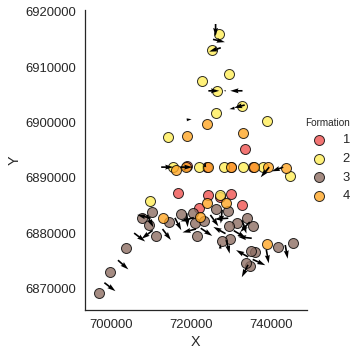

In [4]:
gp.plot_data(geo_data, direction='z')

This model consist in 3 different depositional series. This mean that only data in the same depositional series affect the interpolation. To select with formations belong to witch series we will use the ```set_data_series``` function which takes a python dictionary as input.

We can see the unique formations with:

In [5]:
gp.get_series(geo_data)

,Default serie
0,SimpleMafic2
1,SimpleBIF
2,SimpleMafic1
3,EarlyGranite


Setting the series we also give the specific order of the series. In python 3.6 and above the dictionaries conserve the key order so it is not necessary to give explicitly the order of the series. 

Notice as well that the order of the formations within each series is not relevant for the result but in case of being wrong can lead to confusing color coding (work in progress). 

In the representation given by `get_series` the elements get repeated but is only how Pandas print tables.

In [4]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"], verbose=1)

,EarlyGranite_Series,BIF_Series,SimpleMafic_Series
0,EarlyGranite,SimpleMafic2,SimpleMafic1
1,NaN,SimpleBIF,NaN


In [21]:
geo_data.order_table()

In [5]:
%matplotlib qt5
sys.path.append("../gempy")
import strat_pile as sp

import importlib
importlib.reload(sp)
sp.StratigraphicPile(geo_data)

In [76]:
geo_data.get_formations()

array(['EarlyGranite', 'SimpleBIF', 'SimpleMafic2', 'SimpleMafic1'], dtype=object)

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [5]:
interp_data = gp.InterpolatorInput(geo_data)

In [6]:
sol = gp.compute_model(interp_data)

Now if we analyse the results we have a 3D array where the axis 0 represent the superposition of the series (potential fields). The color coding is working process yet.

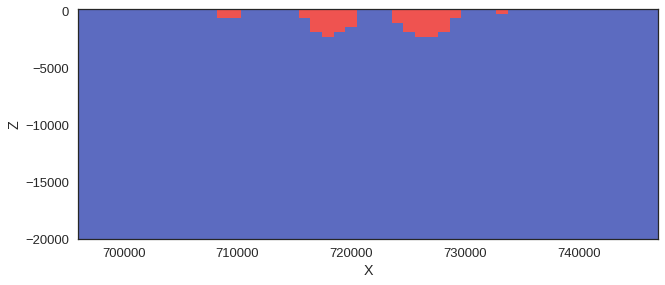

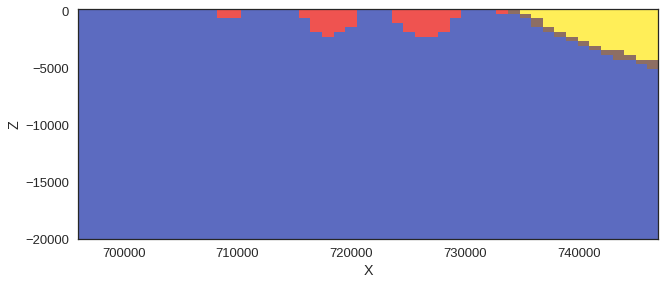

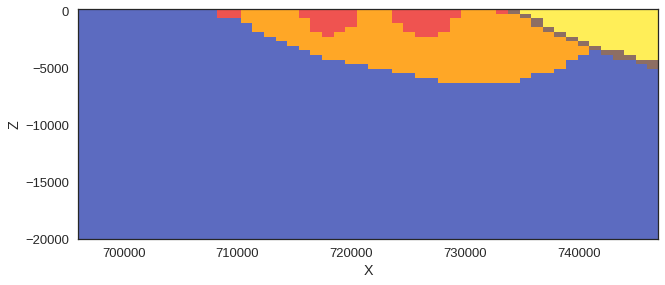

In [7]:
import matplotlib.pyplot as plt
gp.plot_section(geo_data, sol[0,0,:], 11)
plt.show()
gp.plot_section(geo_data, sol[1,0,:], 11)
plt.show()
gp.plot_section(geo_data, sol[2,0,:], 11)
plt.show()

In [25]:
sol[2,0,:]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

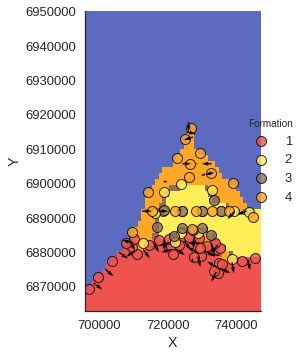

In [8]:
%matplotlib inline
gp.plot_section(geo_data, sol[2,0,:], -1, direction='z', plot_data=True)

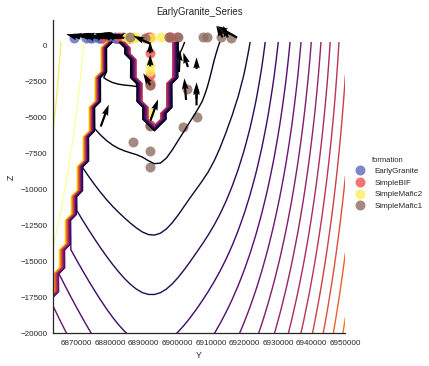

In [24]:
gp.plot_potential_field(geo_data, sol[2,1,:], 25,direction='x', cmap='inferno_r')

The axis 1 keeps the potential field:

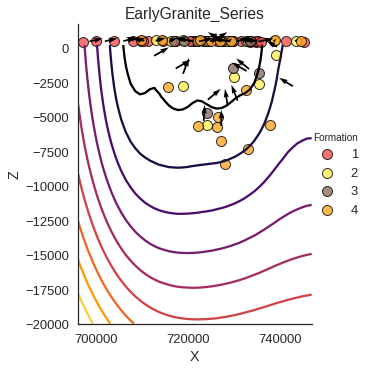

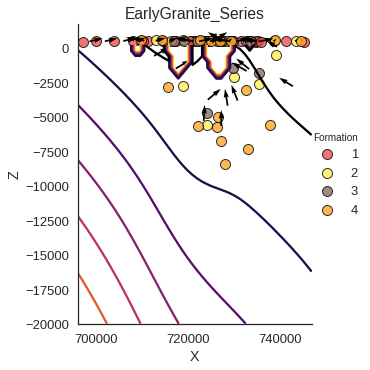

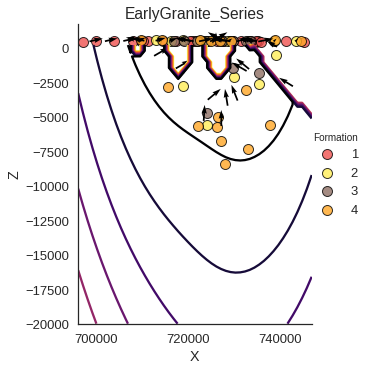

In [9]:
gp.plot_potential_field(geo_data, sol[0,1,:], 11, cmap='inferno_r')
plt.show()
gp.plot_potential_field(geo_data, sol[1,1,:], 11, cmap='inferno_r')
plt.show()
gp.plot_potential_field(geo_data, sol[2,1,:], 11, cmap='inferno_r')
plt.show()

And the axis 2 keeps the faults network that in this model since there is not faults does not represent anything.

Additionally with can export the blocks to vtk in order to visualize them in Paraview. We are working in visualization in place as well.

In [15]:
gp.export_vtk_rectilinear(geo_data, sol[-1, 0, :], path=None)

In [16]:
sol[-1, 1, :].max(), sol[-1, 1, :].min()

(3.5883067, 1.7408259)

In [19]:
interp_data.potential_at_interfaces

array([[ 0.        ,  0.        ,  1.72539413,  0.        ],
       [ 2.56174302,  0.        ,  0.        ,  2.53867388],
       [ 0.        ,  3.5672462 ,  0.        ,  0.        ]], dtype=float32)

In [10]:

v_l, s_l = gp.get_surfaces(sol[-1, 1, :], interp_data,)

In [14]:
gp.plot_surfaces_3D(geo_data, v_l, s_l, list(interp_data.get_formation_number())[:-1], [1,2,3,4])

722403.813 6880913.25 470.70706500000006
722403.813 6880913.25 470.70706500000006
722403.813 6880913.25 470.70706500000006
722403.813 6880913.25 470.70706500000006
718928.344 6883605.5 509.462245
718928.344 6883605.5 509.462245
718928.344 6883605.5 509.462245
718928.344 6883605.5 509.462245
720690.563 6882822.25 489.90942300000006
720690.563 6882822.25 489.90942300000006
720690.563 6882822.25 489.90942300000006
720690.563 6882822.25 489.90942300000006
721229.0005 6880766.25 477.680894
721229.0005 6880766.25 477.680894
721229.0005 6880766.25 477.680894
721229.0005 6880766.25 477.680894
710459.844 6880521.5 511.839758
710459.844 6880521.5 511.839758
710459.844 6880521.5 511.839758
710459.844 6880521.5 511.839758
724802.4065 6883312.0 473.707869
724802.4065 6883312.0 473.707869
724802.4065 6883312.0 473.707869
724802.4065 6883312.0 473.707869
727739.4375 6884242.0 474.25872599999997
727739.4375 6884242.0 474.25872599999997
727739.4375 6884242.0 474.25872599999997
727739.4375 6884242.0 474

In [12]:
list(interp_data.get_formation_number())[:-1]

['EarlyGranite', 'SimpleBIF', 'SimpleMafic2', 'SimpleMafic1']

In [13]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 2,
 'SimpleMafic1': 4,
 'SimpleMafic2': 3}

In [18]:
np.unique([5,3,4,4])

array([3, 4, 5])